In [1]:
import pandas as pd
import numpy as np
import os
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
%pprint off
savepath = '/Users/songkim/GoogleDrive/Primary/Projects/VerbVector/AMT/html/experiments/ratings2/results'

Pretty printing has been turned OFF


In [2]:
def rearrange_col(dataframe, col_to_move, reference_col, right=True):
    col_list = dataframe.columns.values.tolist()
    col_list2 = [x for x in col_list if x != col_to_move]
    reference_idx = col_list2.index(reference_col)
    if right==True:
        col_list3 = []
        for y in col_list2:
            col_list3.append(y)
            if y == reference_col:
                col_list3.append(col_to_move)
        return dataframe[col_list3]
    else:
        col_list3 = []
        for y in col_list2:
            col_list3.append(y)
            if y == reference_col:
                col_list3.insert(-2, col_to_move)
        return  dataframe[col_list3]

In [3]:
fpath = '/Users/songkim/GoogleDrive/Primary/Projects/VerbVector/AMT/html/experiments/ratings2/results/results_clean_0628.csv'

In [4]:
#### PART1: CALCULATE SUBJECT-TO-GROUP CORRELATION PER HIT
res = pd.read_csv(fpath, converters={'response': eval, 'RT': eval, 'buttonpress': eval, 'catch_response': eval})
#res.sort_values(by=['stim_id', 'id'], inplace=True)
print('before catch-based rejection:', res.shape)

######################### check number of responses per lemma
# for i in set(res['stim_id']): 
#     df = res.loc[res['stim_id']==i]
#     print (i, df.shape[0])

########################## convert N/A to 0 
res['catch_response_upd'] = res['catch_response'].apply(lambda x: [0 if i=='7' else float(i) for i in x])
res['response_upd'] = res['response'].apply(lambda x: [0 if i=='7' else float(i) for i in x])

res = rearrange_col(res, 'catch_response_upd', 'catch_response')
res = rearrange_col(res, 'response_upd', 'response')

res.drop(columns=['catch_response', 'response'], inplace=True)
res.rename(columns={'response_upd': 'response', 'catch_response_upd':'catch_response'}, inplace=True)

# ######################## drop bad subjects
res = res.loc[res['badsubject']=='N', ]
print ('after catch-based rejection:', res.shape)
res.head()

before catch-based rejection: (2816, 20)
after catch-based rejection: (2458, 20)


,id,stim_id,stim,subject_id,response,start,end,RT,buttonpress,turkcode,subject_num,gender,age,education,occupation,results_id,catch_subject_id,catch_response,correctN,badsubject
0,1,159,laugh,1,"[1.0, 0.0, 0.0, 3.0, 0.0, 0.0, 1.0, 5.0, 6.0, ...",2021-05-25 16:26:41,2021-05-25 16:35:15,"[10451, 2940, 2319, 3999, 2779, 3110, 6525, 75...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, ...",8545510,A3I9XLIHPPWPN1,f,57,18.0,Dataanalystadministrationassistant,1,1,"[0.0, 6.0, 0.0, 6.0, 6.0]",4,N
1,2,295,see,2,"[6.0, 3.0, 0.0, 1.0, 1.0, 2.0, 0.0, 4.0, 0.0, ...",2021-05-25 16:29:38,2021-05-25 16:36:24,"[4024, 9148, 2726, 5130, 5199, 3487, 2790, 432...","[1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",2727964,A2CWJRAEFZ44HU,m,36,14.0,nursingassistantihelpoutpatientsandstaffinahos...,2,2,"[0.0, 6.0, 0.0, 6.0, 6.0]",4,N
2,3,214,flatten,3,"[3.0, 0, 0, 0, 5.0, 3.0, 1.0, 1.0, 3.0, 2.0, 0...",2021-05-25 16:26:58,2021-05-25 16:36:47,"[4432, 2912, 2592, 3640, 7976, 6904, 5368, 608...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",3205581,A7ERZELTAMWL5,m,70,18.0,PatrolofficerIridearoundaresidentialcomplextoc...,3,3,"[0.0, 6.0, 0.0, 6.0, 6.0]",4,N
4,5,262,calm,5,"[4.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 1.0, 4.0, ...",2021-05-25 16:28:07,2021-05-25 16:38:09,"[4142, 2349, 7257, 8933, 4802, 3372, 3349, 830...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, ...",1247441,A2LF84L3K71GR2,f,38,12.0,RestaurantSupervisor,5,5,"[0.0, 6.0, 0.0, 6.0, 6.0]",4,N
5,6,7,jump,6,"[3.0, 0, 0, 0, 0, 1.0, 0.0, 3.0, 6.0, 3.0, 0.0...",2021-05-25 16:29:58,2021-05-25 16:45:19,"[9500, 3180, 3371, 90941, 4762, 8544, 6685, 40...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",8286749,A1VSHM4NLZ705D,m,41,12.0,retail,6,6,"[0.0, 6.0, 0.0, 6.0, 6.0]",4,N


In [16]:
#### extrat "live" responses
# live = res.loc[res['stim_id']==1]

# response_n = len(res.iloc[0]["response"])
# column = []
# for i in range(1, response_n+1):
#     column.append('q'+str(i))  ##### column = ['q1', 'q2', ... 'q72']

# live_responses = pd.DataFrame(live.response.tolist(), columns=column).astype(int)

# savepath = '/Users/songkim/GoogleDrive/Primary/Projects/VerbVector/AMT/html/experiments/ratings2/results'
# live_responses.to_csv(savepath+ '/live_reponses.csv', index=None)

In [20]:
#################### create an average dict ###################### 
stim_id_n = len(set(res['stim_id']))  ###i.e., 320

response_n = len(res.iloc[0]["response"])
column = []
for i in range(1, response_n+1):
    column.append('q'+str(i))  ##### column = ['q1', 'q2', ... 'q72']

avg_dict = {}
for i in range(1, stim_id_n+1):
    df = res.loc[res['stim_id']==i, ]
    df_responses = pd.DataFrame(df.response.tolist(), columns=column).astype(int)
    avg = list(df_responses.mean())
    avg = [round(i,3) for i in avg]
#     print (df.shape)
#     print (df_responses.shape)

    avg_dict[i] = {'stim': df.iloc[0]['stim'], 'subject_ids': df['subject_id'].values.tolist(), 
                  'response_N': df.shape[0], 'avg_rating': avg}
#avg_df = pd.DataFrame.from_dict(avg_dict, orient='index')

In [35]:
avg_dict[1]

{'stim': 'live', 'subject_ids': [206, 213, 223, 286, 266, 179, 5, 97, 123], 'response_N': 9, 'avg_rating': [2.333, 1.111, 0.222, 0.778, 0.444, 0.778, 0.778, 3.111, 4.667, 1.667, 1.889, 2.111, 2.667, 4.0, 1.667, 0.556, 0.333, 0.444, 0.778, 0.222, 0.111, 1.556, 2.0, 0.556, 0.222, 0.667, 0.889, 0.778, 3.111, 1.333, 1.0, 2.667, 2.889, 2.444, 5.667, 2.667, 1.778, 2.111, 0.667, 0.667, 0.667, 0.556, 2.0, 3.222, 4.333, 2.111, 3.222, 4.111, 4.0, 5.667, 2.778, 5.444, 4.333, 4.0, 1.0, 4.889, 0.444, 3.667, 1.0, 0.889, 0.333, 1.0, 0.889, 4.0, 5.333, 2.111, 3.667, 2.778, 3.444, 0.889, 4.111, 3.778]}

In [54]:
########calculate intersubject correlation and update res
from scipy.stats.stats import pearsonr

res_dict = res.set_index('id').to_dict(orient='index')
for k, v in res_dict.items():
    response = v['response']
    check = v['stim'] == avg_dict[v['stim_id']]['stim']
    if check == False:
        print ('somethign wrong!')
    group_response = avg_dict[v['stim_id']]['avg_rating']
    v['corr'] = round(pearsonr(response, group_response)[0],3) ###correlation b/w this vector and group average vector for word X.
    v['corr_fisher'] = np.arctanh(v['corr'])
#pearsonr(response, group_response)[0]

### convert res_dict to df
res_upd = pd.DataFrame.from_dict(res_dict, orient='index')


### write res_upd to csv 
res_upd.to_csv(savepath + '/HITs_clean_with_correlations.csv', index=False) ### clean HITs after dropping catch-failed HITs

#min(res_upd['corr_fisher'].values.tolist())
# res_upd2= res_upd.drop(columns=["RT", "buttonpress","turkcode","subject_num", "catch_subject_id","occupation"])
# res_upd2.loc[res_upd['badsubject']=='Y', ].sort_values(by='corr')

In [39]:
###### plot histogram
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
res_upd.hist(column='corr_fisher', cumulative=True, bins=100, ax=ax)
#fig.savefig(savepath+'/subj_to_group_corr_hist.png')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd181d473d0>],
      dtype=object)

In [47]:
res_upd.head()

,stim_id,stim,subject_id,response,start,end,RT,buttonpress,turkcode,subject_num,gender,age,education,occupation,results_id,catch_subject_id,catch_response,correctN,badsubject,corr,corr_fisher
1,159,laugh,1,"[1.0, 0.0, 0.0, 3.0, 0.0, 0.0, 1.0, 5.0, 6.0, ...",2021-05-25 16:26:41,2021-05-25 16:35:15,"[10451, 2940, 2319, 3999, 2779, 3110, 6525, 75...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, ...",8545510,A3I9XLIHPPWPN1,f,57,18.0,Dataanalystadministrationassistant,1,1,"[0.0, 6.0, 0.0, 6.0, 6.0]",4,N,0.893,1.436545
2,295,see,2,"[6.0, 3.0, 0.0, 1.0, 1.0, 2.0, 0.0, 4.0, 0.0, ...",2021-05-25 16:29:38,2021-05-25 16:36:24,"[4024, 9148, 2726, 5130, 5199, 3487, 2790, 432...","[1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",2727964,A2CWJRAEFZ44HU,m,36,14.0,nursingassistantihelpoutpatientsandstaffinahos...,2,2,"[0.0, 6.0, 0.0, 6.0, 6.0]",4,N,0.788,1.066133
3,214,flatten,3,"[3.0, 0, 0, 0, 5.0, 3.0, 1.0, 1.0, 3.0, 2.0, 0...",2021-05-25 16:26:58,2021-05-25 16:36:47,"[4432, 2912, 2592, 3640, 7976, 6904, 5368, 608...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",3205581,A7ERZELTAMWL5,m,70,18.0,PatrolofficerIridearoundaresidentialcomplextoc...,3,3,"[0.0, 6.0, 0.0, 6.0, 6.0]",4,N,0.753,0.979848
5,262,calm,5,"[4.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 1.0, 4.0, ...",2021-05-25 16:28:07,2021-05-25 16:38:09,"[4142, 2349, 7257, 8933, 4802, 3372, 3349, 830...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, ...",1247441,A2LF84L3K71GR2,f,38,12.0,RestaurantSupervisor,5,5,"[0.0, 6.0, 0.0, 6.0, 6.0]",4,N,0.818,1.150743
6,7,jump,6,"[3.0, 0, 0, 0, 0, 1.0, 0.0, 3.0, 6.0, 3.0, 0.0...",2021-05-25 16:29:58,2021-05-25 16:45:19,"[9500, 3180, 3371, 90941, 4762, 8544, 6685, 40...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",8286749,A1VSHM4NLZ705D,m,41,12.0,retail,6,6,"[0.0, 6.0, 0.0, 6.0, 6.0]",4,N,0.871,1.337208


In [42]:
###### Part 2: find out bad words
quesf = '/Users/songkim/GoogleDrive/Primary/Projects/VerbVector/AMT/html/experiments/ratings2/stimuli/questions.txt'
ques = pd.read_csv(quesf, delimiter='\t', header=None).iloc[:, :2].rename(columns={0:'fname', 1:'question'})
q_dict = ques.to_dict(orient='index')

#find only "verb" features
new_q = ques.iloc[67:,]₩ㅁ
caused = ques.loc[ques['fname']=='Caused',]

verb_ques = pd.concat([caused, new_q])

In [43]:
verb_ques

,fname,question
46,Caused,To what extent does this verb describe an even...
67,Boundedness,Some verbs refer to an activity that could con...
68,Actor,To what extent does this verb describe somethi...
69,Done to Something Else,To what extent does this verb describe an acti...
70,State of Being,To what extent does this verb describe a <i>ch...
71,Require Energy Input,To what extent is physical or mental energy re...


In [44]:
q_dict[46]['fname']

'Caused'

In [ ]:
## export data (for each verb, one response for each feature)

res_sub = res_upd[["stim_id", "stim", "subject_id", "response","correctN","corr_fisher"]]

new_column= list(range(response_n)) #[0,1,2,...71]
res_sub[new_column] = pd.DataFrame(res_sub.response.tolist(), index= res_sub.index)
res_sub = res_sub[["stim_id", "stim", "subject_id", "correctN", "corr_fisher", 46, 67, 68, 69, 70, 71]]

d = dict()
for i in [46,67,68,69,70,71]:
    d[i] = q_dict[i]['fname']

res_sub = res_sub.rename(columns=d)
res_sub.head()

##export res_sub
savepath = '/Users/songkim/GoogleDrive/Primary/Projects/VerbVector/AMT/html/experiments/ratings2/results'
res_sub.to_csv(savepath+'/clean_5features_individual.csv', index=False)

#df2[['team1','team2']] = pd.DataFrame(df2.teams.tolist(), index= df2.index)
#to_add = pd.DataFrame(res_sub.response.tolist()).iloc[:, [46,67,68,69,70,71]]
#pd.DataFrame(res_sub.response.tolist())
#df2[['team1','team2']] = pd.DataFrame(df2.teams.tolist(), index= df2.index)
#df_responses = pd.DataFrame(df.response.tolist(), columns=column).astype(int)

ValueError: scatter requires x column to be numeric

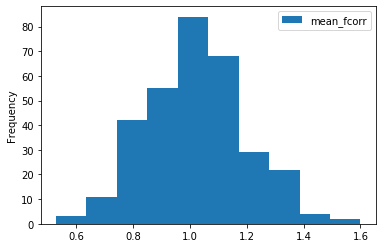

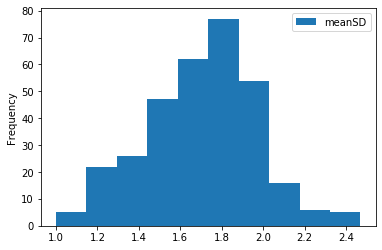

In [135]:
#########PART3: integrate SD dataframe with verblist
sdpath = '/Users/songkim/GoogleDrive/Primary/Projects/VerbVector/AMT/html/experiments/ratings2/results/SD_by_word_and_feature.csv'
listpath = '/Users/songkim/GoogleDrive/Primary/Projects/VerbVector/Verblists/List320.csv'

df_sd = pd.read_csv(sdpath, index_col=0)
df_list = pd.read_csv(listpath)
df_list = df_list.loc[df_list['in']==1]

###merge of verblist 
df_sd_upd = pd.merge(left=df_sd, right=df_list, left_on= 'word', right_on='Lemma')

#### clean up merged df
df_sd_upd.drop(columns=['Lemma', 'badverb', 'GrandIndex', 'in', 'whyexcluded', 
                        'abs_marginality', 'rel_marginality', 'SynClassLitrt', 'SynClassSK', 'good'], inplace=True)


#### add <mean (subject-to-group) correlation to df_sd_upd ##### 
corr_raw = pd.read_csv(savepath + '/HITs_clean_with_correlations.csv')
corr_raw = corr_raw[["stim_id", "stim", "subject_id", "corr_fisher"]]
corr_raw['corr_fisher'] = corr_raw['corr_fisher'].round(decimals=3)
corr_dict = {}
for i in range(1,321):
    df_sel = corr_raw.loc[corr_raw['stim_id']==i]
    stim_id = df_sel.iloc[0]['stim_id']
    word = df_sel.iloc[0]['stim']
    corr_list = df_sel['corr_fisher'].values.tolist()
    corr_list.sort(reverse=True)
    corr_list = [round(c,2) for c in corr_list]
    mean_corr = round(df_sel['corr_fisher'].mean(), 2)
    d_add = {'stim_id': stim_id, 'word': word, 'corr_list':corr_list, 'mean_fcorr':mean_corr}
    corr_dict[i] = d_add
    
corr_df = pd.DataFrame.from_dict(corr_dict, orient='index')


df_sd_out = pd.merge(left=df_sd_upd, right=corr_df, on='word')
df_sd_out = rearrange_col(df_sd_out, 'mean_fcorr', 'meanSD')
df_sd_out = rearrange_col(df_sd_out, 'corr_list', 'mean_fcorr')
######

### write to csv
savepath = '/Users/songkim/GoogleDrive/Primary/Projects/VerbVector/AMT/html/experiments/ratings2/results'
df_sd_out.to_csv(savepath + '/list320_with_sd_correlation.csv', index=False)


## plotting
#df_sd_out.plot(x="stim_id", y=["mean_fcorr"], kind="hist")
df_sd_out.plot(y=["mean_fcorr"], kind="hist")
df_sd_out.plot(y=["meanSD"], kind="hist")

df_sd_out.plot(x="SynClass", y="mean_fcorr", kind="scatter")

In [121]:
df_sd_out.head()

,word,count,Actor,Boundedness,Caused,Done.to.Something.Else,Require.Energy.Input,State.of.Being,meanSD,mean_corr,corr_list,syn_matched,freq_matched,LogFreqHAL,Concreteness,AgeofAcqsn,Database,Trans_Intrans,SynClass,Note,google_intrans,google_trans,AspClass,ChangeOfState,SemClass,SemanticTypeLevin,SemanticTypeEntry,Percentage_dom_PoS,Length,Ortho_N,Phono_N,OLD,PLD,NPhon,NSyll,I_Mean_RT,I_Mean_Accuracy,I_NMG_Mean_RT,I_NMG_Mean_Accuracy,N2_F,N3_F,I_Mean_RT_z,I_Mean_Accuracy_z,AgeofAcqsn_z,LogFreqHAL_z,stim_id
0,hit,7,2.34,2.73,2.31,2.38,2.77,2.27,2.47,1.11,"[1.39, 1.33, 1.29, 1.23, 1.17, 0.86, 0.48]",1,1,11.069,4.11,4.75,VerbNet,transitive only,transitive,NaN,16.02,83.98,Semelfactive,0,obj-directed action,"verbs of throwing, verbs of contact by impact,...","17.1throw, 18.1hit, 18.4thud, 47.8hug",0.91,3,19,37,1.00,1.00,3,1,536.469,0.97,533.103,1.000,4577.52,91.26,-1.834575,0.65,-1.675676,2.045417,123
1,behave,4,2.63,3.20,1.29,2.65,2.08,2.63,2.41,0.61,"[0.83, 0.8, 0.72, 0.09]",1,1,8.656,1.78,4.28,VerbNet,both,unergative,NaN,93.57,6.43,Process,0,other,verbs with predicative complements,29.6masquerade,1.00,6,1,1,2.15,2.40,5,2,699.125,0.97,571.259,1.000,771.87,116.65,-0.629538,0.65,-1.834459,1.040000,9
2,owe,6,2.34,2.58,1.97,2.81,2.51,2.00,2.37,0.87,"[1.43, 1.39, 0.76, 0.73, 0.7, 0.2]",1,1,8.473,2.07,8.61,VerbNet,transitive only,transitive,3 arguments,28.89,71.11,State,0,social or interpersonal event,verbs of change of possession,13.3FUT:have,1.00,3,8,14,1.45,1.00,1,1,640.607,0.85,637.962,0.963,479.78,12.61,-1.063069,0.05,-0.371622,0.963750,152
3,emerge,6,1.94,1.33,3.13,2.58,2.14,2.95,2.35,0.78,"[1.07, 0.91, 0.91, 0.77, 0.55, 0.46]",1,1,7.707,2.27,9.76,VerbNet,intransitive only,unaccusative,tricky,98.53,1.47,Achievement,0,"appearance, disappearance, and occurrence","appearance, disappearance, and occurrence",48.1.1appear,1.00,6,0,2,2.15,2.15,4,2,653.382,1.00,631.889,1.000,318.67,111.12,-0.968425,0.80,0.016892,0.644583,68
4,vanish,6,2.59,2.25,2.81,1.72,2.35,2.35,2.35,0.77,"[1.08, 0.93, 0.81, 0.78, 0.66, 0.38]",1,1,7.241,2.77,8.58,VerbNet,intransitive only,unaccusative,NaN,98.12,1.88,Achievement,0,"appearance, disappearance, and occurrence","appearance, disappearance, and occurrence",48.2die,1.00,6,2,2,1.85,1.90,5,2,672.515,0.97,601.222,1.000,530.52,88.72,-0.826678,0.65,-0.381757,0.450417,74


In [106]:
df_sd_upd.head()

,word,count,Actor,Boundedness,Caused,Done.to.Something.Else,Require.Energy.Input,State.of.Being,meanSD,syn_matched,freq_matched,LogFreqHAL,Concreteness,AgeofAcqsn,Database,Trans_Intrans,SynClass,Note,google_intrans,google_trans,AspClass,ChangeOfState,SemClass,SemanticTypeLevin,SemanticTypeEntry,Percentage_dom_PoS,Length,Ortho_N,Phono_N,OLD,PLD,NPhon,NSyll,I_Mean_RT,I_Mean_Accuracy,I_NMG_Mean_RT,I_NMG_Mean_Accuracy,N2_F,N3_F,I_Mean_RT_z,I_Mean_Accuracy_z,AgeofAcqsn_z,LogFreqHAL_z
0,hit,7,2.34,2.73,2.31,2.38,2.77,2.27,2.47,1,1,11.069,4.11,4.75,VerbNet,transitive only,transitive,NaN,16.02,83.98,Semelfactive,0,obj-directed action,"verbs of throwing, verbs of contact by impact,...","17.1throw, 18.1hit, 18.4thud, 47.8hug",0.91,3,19,37,1.00,1.00,3,1,536.469,0.97,533.103,1.000,4577.52,91.26,-1.834575,0.65,-1.675676,2.045417
1,behave,4,2.63,3.20,1.29,2.65,2.08,2.63,2.41,1,1,8.656,1.78,4.28,VerbNet,both,unergative,NaN,93.57,6.43,Process,0,other,verbs with predicative complements,29.6masquerade,1.00,6,1,1,2.15,2.40,5,2,699.125,0.97,571.259,1.000,771.87,116.65,-0.629538,0.65,-1.834459,1.040000
2,owe,6,2.34,2.58,1.97,2.81,2.51,2.00,2.37,1,1,8.473,2.07,8.61,VerbNet,transitive only,transitive,3 arguments,28.89,71.11,State,0,social or interpersonal event,verbs of change of possession,13.3FUT:have,1.00,3,8,14,1.45,1.00,1,1,640.607,0.85,637.962,0.963,479.78,12.61,-1.063069,0.05,-0.371622,0.963750
3,emerge,6,1.94,1.33,3.13,2.58,2.14,2.95,2.35,1,1,7.707,2.27,9.76,VerbNet,intransitive only,unaccusative,tricky,98.53,1.47,Achievement,0,"appearance, disappearance, and occurrence","appearance, disappearance, and occurrence",48.1.1appear,1.00,6,0,2,2.15,2.15,4,2,653.382,1.00,631.889,1.000,318.67,111.12,-0.968425,0.80,0.016892,0.644583
4,vanish,6,2.59,2.25,2.81,1.72,2.35,2.35,2.35,1,1,7.241,2.77,8.58,VerbNet,intransitive only,unaccusative,NaN,98.12,1.88,Achievement,0,"appearance, disappearance, and occurrence","appearance, disappearance, and occurrence",48.2die,1.00,6,2,2,1.85,1.90,5,2,672.515,0.97,601.222,1.000,530.52,88.72,-0.826678,0.65,-0.381757,0.450417


In [107]:
corr_df.head()

,stim_id,word,corr_list,mean_corr
1,1,live,"[1.01, 1.45, 0.91, 1.27, 1.31, 1.15, 1.12, 0.7...",1.13
2,2,speak,"[1.27, 1.28, 1.41, 1.36, 1.55, 1.15, 1.37, 1.2...",1.36
3,3,listen,"[1.19, 1.17, 1.02, 0.87, 1.08, 0.07, 1.04, 0.2...",0.87
4,4,walk,"[1.47, 1.62, 1.43, 1.76, 1.24, 1.49, 1.5]",1.50
5,5,fly,"[0.3, 0.92, 1.06, 0.93, 0.63, 0.89, 1.06, 1.04]",0.85


In [88]:
df_sd_upd.head()

,word,count,Actor,Boundedness,Caused,Done.to.Something.Else,Require.Energy.Input,State.of.Being,meanSD,syn_matched,freq_matched,LogFreqHAL,Concreteness,AgeofAcqsn,Database,Trans_Intrans,SynClass,Note,google_intrans,google_trans,AspClass,ChangeOfState,SemClass,SemanticTypeLevin,SemanticTypeEntry,Percentage_dom_PoS,Length,Ortho_N,Phono_N,OLD,PLD,NPhon,NSyll,I_Mean_RT,I_Mean_Accuracy,I_NMG_Mean_RT,I_NMG_Mean_Accuracy,N2_F,N3_F,I_Mean_RT_z,I_Mean_Accuracy_z,AgeofAcqsn_z,LogFreqHAL_z
0,hit,7,2.34,2.73,2.31,2.38,2.77,2.27,2.47,1,1,11.069,4.11,4.75,VerbNet,transitive only,transitive,NaN,16.02,83.98,Semelfactive,0,obj-directed action,"verbs of throwing, verbs of contact by impact,...","17.1throw, 18.1hit, 18.4thud, 47.8hug",0.91,3,19,37,1.00,1.00,3,1,536.469,0.97,533.103,1.000,4577.52,91.26,-1.834575,0.65,-1.675676,2.045417
1,behave,4,2.63,3.20,1.29,2.65,2.08,2.63,2.41,1,1,8.656,1.78,4.28,VerbNet,both,unergative,NaN,93.57,6.43,Process,0,other,verbs with predicative complements,29.6masquerade,1.00,6,1,1,2.15,2.40,5,2,699.125,0.97,571.259,1.000,771.87,116.65,-0.629538,0.65,-1.834459,1.040000
2,owe,6,2.34,2.58,1.97,2.81,2.51,2.00,2.37,1,1,8.473,2.07,8.61,VerbNet,transitive only,transitive,3 arguments,28.89,71.11,State,0,social or interpersonal event,verbs of change of possession,13.3FUT:have,1.00,3,8,14,1.45,1.00,1,1,640.607,0.85,637.962,0.963,479.78,12.61,-1.063069,0.05,-0.371622,0.963750
3,emerge,6,1.94,1.33,3.13,2.58,2.14,2.95,2.35,1,1,7.707,2.27,9.76,VerbNet,intransitive only,unaccusative,tricky,98.53,1.47,Achievement,0,"appearance, disappearance, and occurrence","appearance, disappearance, and occurrence",48.1.1appear,1.00,6,0,2,2.15,2.15,4,2,653.382,1.00,631.889,1.000,318.67,111.12,-0.968425,0.80,0.016892,0.644583
4,vanish,6,2.59,2.25,2.81,1.72,2.35,2.35,2.35,1,1,7.241,2.77,8.58,VerbNet,intransitive only,unaccusative,NaN,98.12,1.88,Achievement,0,"appearance, disappearance, and occurrence","appearance, disappearance, and occurrence",48.2die,1.00,6,2,2,1.85,1.90,5,2,672.515,0.97,601.222,1.000,530.52,88.72,-0.826678,0.65,-0.381757,0.450417


In [80]:
i=1
df = corr_raw.loc[corr_raw['stim_id']==i]
corr_list = df['corr_fisher'].values.tolist()
corr_list = [round(c,2) for c in corr_list]
mean_corr = round(df['corr_fisher'].mean(), 3)

In [87]:
df

,stim_id,stim,subject_id,corr_fisher
177,1,live,206,1.013
183,1,live,213,1.452
192,1,live,223,0.912
691,1,live,286,1.267
909,1,live,266,1.309
1041,1,live,179,1.145
1400,1,live,5,1.121
2067,1,live,97,0.789
2255,1,live,123,1.124


In [62]:
corr_raw.loc[corr_raw['stim_id']==1]['corr_fisher'].mean()

1.1257463749554795

In [67]:
corr_raw.loc[corr_raw['stim_id']==1]['corr_fisher'].values.tolist()

[1.013000009376998, 1.4515553918367974, 0.9118102856485196, 1.2670643197533116, 1.3089125547547422, 1.1447279007761264, 1.1212405844621702, 0.7892782993163177, 1.1241280286743327]

In [51]:
df_sd_upd.head()

,word,count,Actor,Boundedness,Caused,Done.to.Something.Else,Require.Energy.Input,State.of.Being,meanSD,syn_matched,freq_matched,LogFreqHAL,Concreteness,AgeofAcqsn,Database,Trans_Intrans,SynClass,Note,google_intrans,google_trans,AspClass,ChangeOfState,SemClass,SemanticTypeLevin,SemanticTypeEntry,Percentage_dom_PoS,Length,Ortho_N,Phono_N,OLD,PLD,NPhon,NSyll,I_Mean_RT,I_Mean_Accuracy,I_NMG_Mean_RT,I_NMG_Mean_Accuracy,N2_F,N3_F,I_Mean_RT_z,I_Mean_Accuracy_z,AgeofAcqsn_z,LogFreqHAL_z
0,hit,7,2.34,2.73,2.31,2.38,2.77,2.27,2.47,1,1,11.069,4.11,4.75,VerbNet,transitive only,transitive,NaN,16.02,83.98,Semelfactive,0,obj-directed action,"verbs of throwing, verbs of contact by impact,...","17.1throw, 18.1hit, 18.4thud, 47.8hug",0.91,3,19,37,1.00,1.00,3,1,536.469,0.97,533.103,1.000,4577.52,91.26,-1.834575,0.65,-1.675676,2.045417
1,behave,4,2.63,3.20,1.29,2.65,2.08,2.63,2.41,1,1,8.656,1.78,4.28,VerbNet,both,unergative,NaN,93.57,6.43,Process,0,other,verbs with predicative complements,29.6masquerade,1.00,6,1,1,2.15,2.40,5,2,699.125,0.97,571.259,1.000,771.87,116.65,-0.629538,0.65,-1.834459,1.040000
2,owe,6,2.34,2.58,1.97,2.81,2.51,2.00,2.37,1,1,8.473,2.07,8.61,VerbNet,transitive only,transitive,3 arguments,28.89,71.11,State,0,social or interpersonal event,verbs of change of possession,13.3FUT:have,1.00,3,8,14,1.45,1.00,1,1,640.607,0.85,637.962,0.963,479.78,12.61,-1.063069,0.05,-0.371622,0.963750
3,emerge,6,1.94,1.33,3.13,2.58,2.14,2.95,2.35,1,1,7.707,2.27,9.76,VerbNet,intransitive only,unaccusative,tricky,98.53,1.47,Achievement,0,"appearance, disappearance, and occurrence","appearance, disappearance, and occurrence",48.1.1appear,1.00,6,0,2,2.15,2.15,4,2,653.382,1.00,631.889,1.000,318.67,111.12,-0.968425,0.80,0.016892,0.644583
4,vanish,6,2.59,2.25,2.81,1.72,2.35,2.35,2.35,1,1,7.241,2.77,8.58,VerbNet,intransitive only,unaccusative,NaN,98.12,1.88,Achievement,0,"appearance, disappearance, and occurrence","appearance, disappearance, and occurrence",48.2die,1.00,6,2,2,1.85,1.90,5,2,672.515,0.97,601.222,1.000,530.52,88.72,-0.826678,0.65,-0.381757,0.450417


In [ ]:
## add "mean (subject-to-group) correlation"
df_sd_upd['meanCorrelation']


In [ ]:
df_sd_upd.head()

In [ ]:
df_sd_upd.head()

In [ ]:
df_sd.head()

In [ ]:
#df_sd_upd['word'].equals(df_sd_upd['Lemma'])
set(df_sd_upd['in'].values.tolist())
#df['Score A'].equals(df['Score B'])

In [ ]:
# list_1 = [1, 1, 1, 1]
# list_2 = [-1, -1, -1, -1]
# list_3 = [1, 3, 5, 7]
# list_4 = [0,0,0,100]
# dfx=pd.DataFrame({"list_1":list_1,"list_2":list_2,"list_3":list_3,"list_4":list_4})
# dfx

In [ ]:
# t1= '0_6_0_6_6'
# t1.split('_')

# testlist = ['5', '7', '3', '0', '6', '0', '3', '1', '0']
# ['0' if t=='7' else t for t in testlist]
#new_prices = [round(price - (price * 10 / 100), 2) if price > 50 else price for price in prices]

In [ ]:
####### spread responses into separate columns
# df_test = res[["id", "stim_id", "response"]]

#print ('before spreading:', res.shape)

# response_n = len(res.iloc[0]["response"])
# column = []
# for i in range(1, response_n+1):
#     column.append('q'+str(i))  ##### column = ['q1', 'q2', ... 'q72']

# res[column] = pd.DataFrame(res.response.tolist(), index=res.index)

# print ('after spreading:', res.shape)

#res.tail()

#df2[['team1','team2']] = pd.DataFrame(df2.teams.tolist(), index= df2.index)

In [ ]:
# for r in range(len(res_upd.iloc[0]['response'])):
#     print (r, res_upd.iloc[0]['response'][r])

In [ ]:
#np.arctanh(0.767)

# from scipy.stats import zprob
# def z_transform(r, n):
#     z = np.log((1 + r) / (1 - r)) * (np.sqrt(n - 3) / 2)
#     p = zprob(-z)
#     return p